## 한국복지패널 데이터 분석
### 분석 목표

1. 성별에 따른 월급 차이
2. 나이와 월급의 관계
3. 연령대에 따른 월급 차이
4. 연령대 및 성별 월급 차이
5. 직업별 월급 차이
6. 성별 직업 빈도
7. 지역별 연령대 비율

## 1. 데이터 분석 준비

### 패키지 설치 및 로드

In [88]:
# 패키지 설치 (필요시)
# pip install pyreadstat

# 패키지 로드
import pyreadstat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (macOS)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [89]:
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기 (원본 보존)
welfare = raw_welfare.copy()

### 데이터 검토

In [90]:
# 데이터 구조 확인
print("데이터 크기:", welfare.shape)
print("\n데이터 앞부분:")
welfare.head()

데이터 크기: (14418, 830)

데이터 앞부분:


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [91]:
# 변수 정보 확인
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


### 변수명 변경

In [92]:
# 주요 변수명 변경
welfare = welfare.rename(columns={'h14_g3': 'sex',          # 성별
                                 'h14_g4': 'birth',        # 태어난 연도
                                 'h14_g10': 'marriage',     # 혼인상태
                                 'h14_g11': 'religion',     # 종교
                                 'p1402_8aq1': 'income',   # 월급
                                 'h14_eco9': 'code_job',   # 직업코드
                                 'h14_reg7': 'code_region'}) # 지역코드

print("변수명 변경 완료")
print("주요 변수들:", ['sex', 'birth', 'income', 'code_job', 'code_region'])

변수명 변경 완료
주요 변수들: ['sex', 'birth', 'income', 'code_job', 'code_region']


## 2. 성별에 따른 월급 차이 분석

### 성별 변수 검토 및 전처리

In [93]:
# 성별 변수 확인
print("성별 변수 타입:", welfare['sex'].dtype)
print("\n성별 빈도:")
welfare['sex'].value_counts()

성별 변수 타입: float64

성별 빈도:


sex
2.0    7913
1.0    6505
Name: count, dtype: int64

코드북에 따르면 1은 남자, 2는 여자를 의미합니다. 분석을 위해 문자로 변경하겠습니다.

성별 변경 결과:


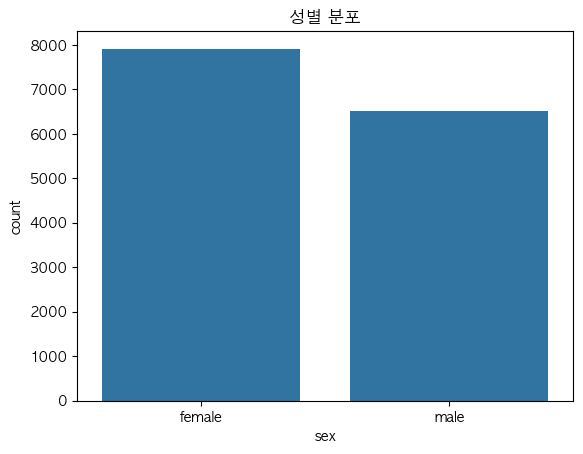

In [94]:
# 성별 변수 전처리
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 변경 결과 확인
print("성별 변경 결과:")
welfare['sex'].value_counts()

# 성별 분포 시각화
sns.countplot(data=welfare, x='sex')
plt.title('성별 분포')
plt.show()

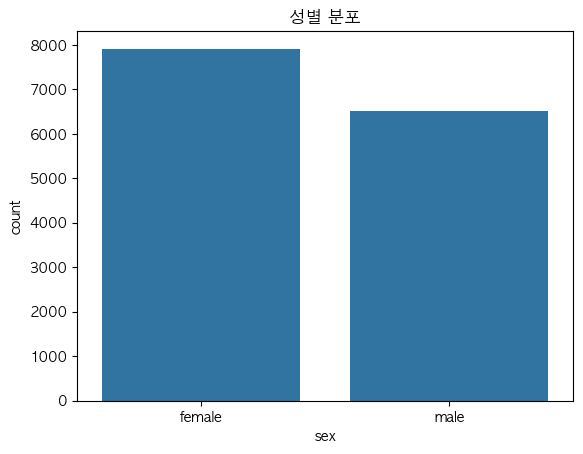

In [95]:
# 성별 분포 시각화
sns.countplot(data=welfare, x='sex')
plt.title('성별 분포')
plt.show()

### 월급 변수 검토 및 전처리

In [96]:
# 월급 변수 확인
print("월급 변수 타입:", welfare['income'].dtype)
print("\n월급 요약 통계:")
welfare['income'].describe()

월급 변수 타입: float64

월급 요약 통계:


count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

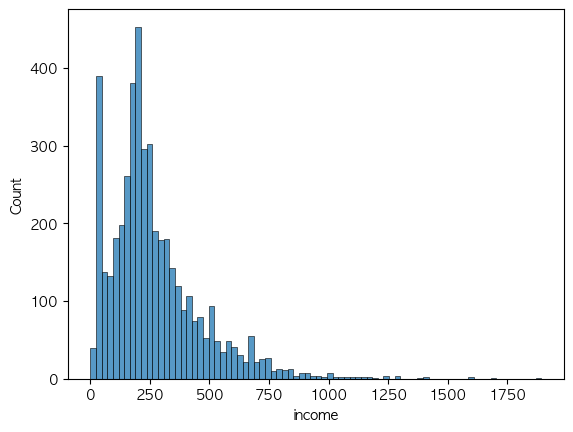

In [97]:
# 월급 분포 확인
sns.histplot(data=welfare, x='income')
plt.xlabel('income')
plt.show()

In [98]:
welfare['income'].describe()


count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [99]:
welfare['income'].isna().sum()

9884

### 성별 월급 차이 분석

In [100]:
# 성별 월급 평균 표 만들기
sex_income = welfare.dropna(subset=['income']).groupby('sex')['income'].mean()
print("성별 월급 평균:")
print(sex_income)
print(f"\n남녀 월급 차이: {sex_income['male'] - sex_income['female']:.1f}만원")

성별 월급 평균:
sex
female    186.293096
male      349.037571
Name: income, dtype: float64

남녀 월급 차이: 162.7만원


분석 결과, 남성의 평균 월급이 여성보다 약 160만원 이상 높은 것으로 나타났습니다.

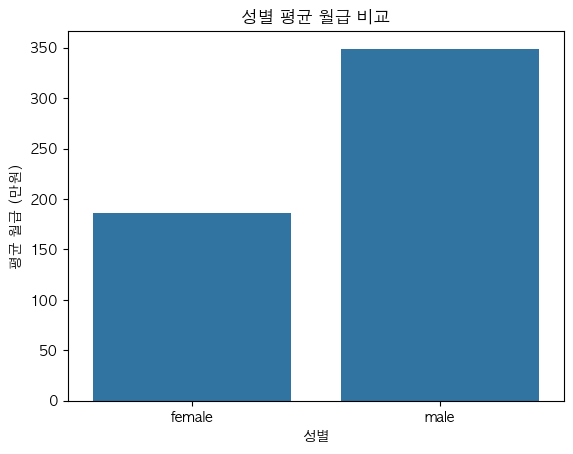

In [101]:
# 성별 월급 차이 시각화
sns.barplot(x=sex_income.index, y=sex_income.values)
plt.title('성별 평균 월급 비교')
plt.xlabel('성별')
plt.ylabel('평균 월급 (만원)')
plt.show()

## 3. 나이와 월급의 관계 분석

### 나이 변수 생성 및 전처리

In [102]:
# 태어난 연도 변수 확인
print("태어난 연도 요약 통계:")
welfare['birth'].describe()

태어난 연도 요약 통계:


count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [103]:
# 나이 변수 생성 (2019년 기준)
welfare['age'] = 2019 - welfare['birth'] + 1

print("나이 변수 생성 완료")
print("나이 요약 통계:")
welfare['age'].describe()

나이 변수 생성 완료
나이 요약 통계:


count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

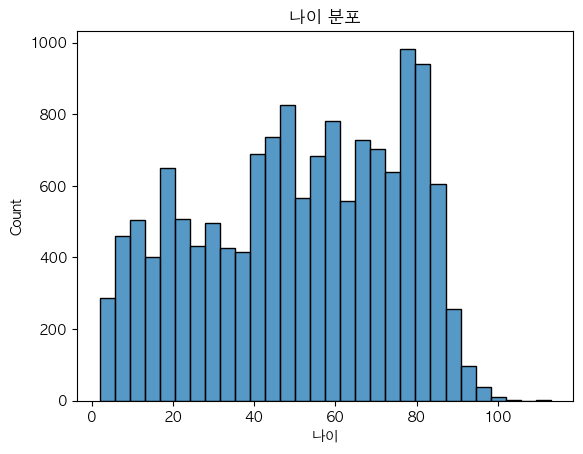

In [104]:
# 나이 분포 확인
sns.histplot(data=welfare, x='age', bins=30)
plt.title('나이 분포')
plt.xlabel('나이')
plt.show()

### 나이와 월급의 관계 분석

In [105]:
# 나이별 월급 평균 계산
age_income = welfare.dropna(subset=['income']).groupby('age')['income'].mean()
print("나이별 월급 평균")
print(age_income.head())

나이별 월급 평균
age
19.0    162.000000
20.0    121.333333
21.0    136.400000
22.0    123.666667
23.0    179.676471
Name: income, dtype: float64


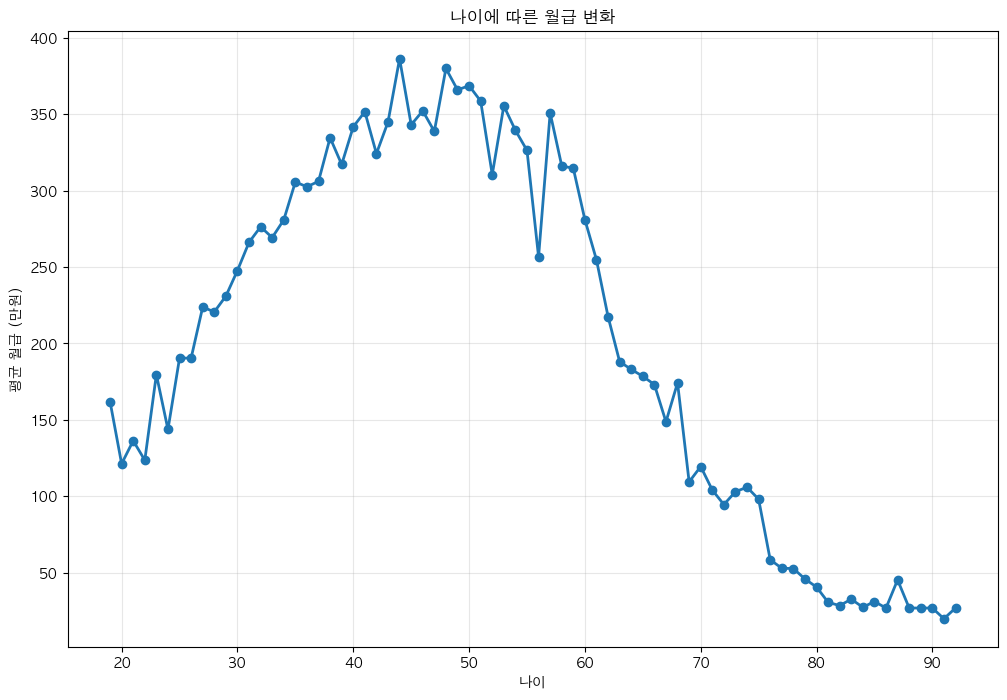

In [106]:
# 나이와 월급의 관계 시각화
plt.figure(figsize=(12, 8))
plt.plot(age_income.index, age_income.values, marker='o', linewidth=2)
plt.title('나이에 따른 월급 변화')
plt.xlabel('나이')
plt.ylabel('평균 월급 (만원)')
plt.grid(True, alpha=0.3)
plt.show()

분석 결과, 20대 초반에는 낮은 월급을 받다가 40대까지 지속적으로 증가하는 추세를 보이며, 60대 후반부터는 급격히 감소하는 패턴을 보입니다.

## 4. 연령대에 따른 월급 차이 분석

### 연령대 변수 생성

In [107]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [108]:
# 연령대 변수 생성
welfare['ageg'] = welfare['age'].apply(lambda x: 'young' if x < 30 
                                       else 'middle' if x < 60 
                                       else 'old')

print("연령대 분포:")
welfare['ageg'].value_counts()

연령대 분포:


ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

In [109]:
# 연령대별 월급 평균 계산
ageg_income = welfare.dropna(subset=['income']).groupby('ageg', as_index=False)['income'].mean()
print("연령대별 평균 월급:")
print(ageg_income)

연령대별 평균 월급:
     ageg      income
0  middle  329.157157
1     old  140.129003
2   young  195.663424


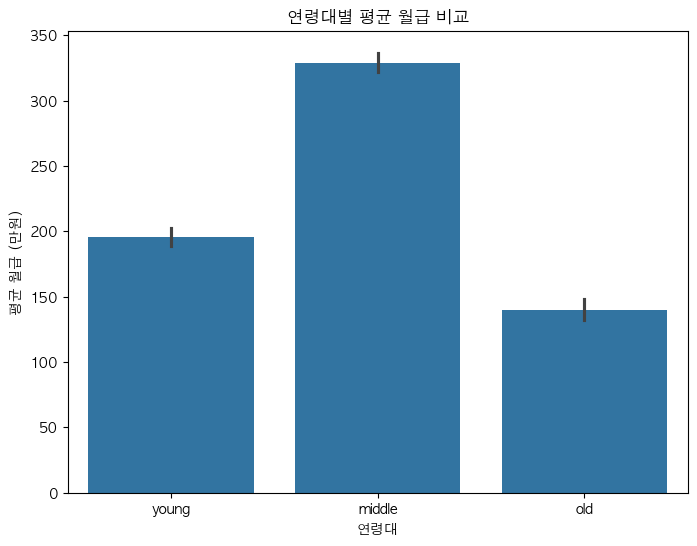

In [110]:
# 연령대별 월급 차이 시각화
plt.figure(figsize=(8, 6))
order = ['young', 'middle', 'old']
sns.barplot(data=welfare.dropna(subset=['income']), x='ageg', y='income', order=order)
plt.title('연령대별 평균 월급 비교')
plt.xlabel('연령대')
plt.ylabel('평균 월급 (만원)')
plt.show()

중년층이 가장 높은 월급을 받으며, 노년층의 월급은 초년층보다도 낮은 것으로 나타났습니다.

## 5. 연령대 및 성별 월급 차이 분석

In [111]:
# 연령대 및 성별 월급 평균 계산
ageg_sex_income = welfare.dropna(subset=['income']).groupby(['ageg', 'sex'])['income'].mean()
print("연령대 및 성별 평균 월급:")
print(ageg_sex_income)

연령대 및 성별 평균 월급:
ageg    sex   
middle  female    230.481735
        male      409.541228
old     female     90.228896
        male      204.570231
young   female    189.822222
        male      204.909548
Name: income, dtype: float64


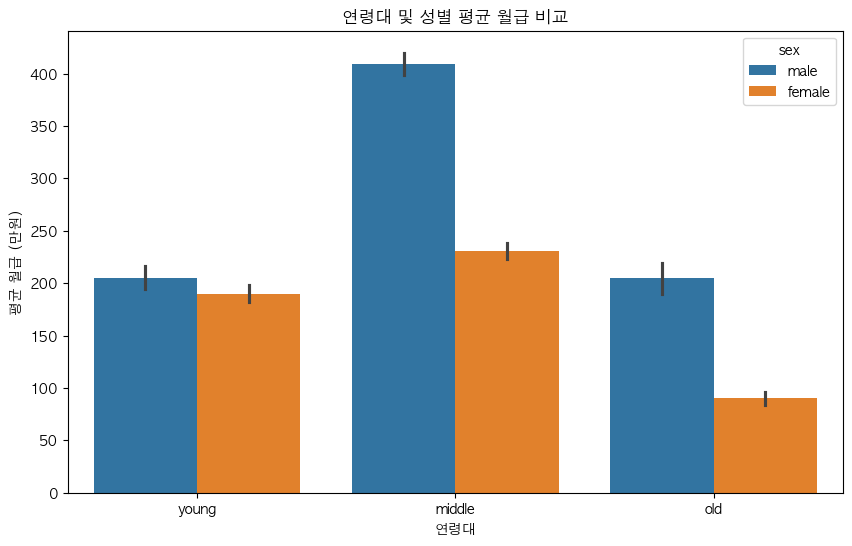

In [112]:
# 연령대 및 성별 월급 차이 시각화
plt.figure(figsize=(10, 6))
order = ['young', 'middle', 'old']
sns.barplot(data=welfare.dropna(subset=['income']), x='ageg', y='income', hue='sex', order=order)
plt.title('연령대 및 성별 평균 월급 비교')
plt.xlabel('연령대')
plt.ylabel('평균 월급 (만원)')
plt.show()

모든 연령대에서 남성이 여성보다 높은 월급을 받고 있으며, 특히 중년층에서 성별 간 월급 격차가 가장 큰 것으로 나타났습니다.

## 6. 직업별 월급 차이 분석

### 직업 변수 전처리

In [113]:
# 직업 코드북 불러오기
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name='직종코드')

print("직업 코드북 구조:")
print(list_job.head())
print("컬럼명:", list_job.columns.tolist())
print("총 직업 수:", len(list_job))

직업 코드북 구조:
   code_job                     job
0       111  의회 의원∙고위 공무원 및 공공단체 임원
1       112                기업 고위 임원
2       121          행정 및 경영 지원 관리자
3       122         마케팅 및 광고∙홍보 관리자
4       131       연구∙교육 및 법률 관련 관리자
컬럼명: ['code_job', 'job']
총 직업 수: 156


In [114]:
# 직업명 매핑
welfare = welfare.merge(list_job, how='left', on='code_job')

print("직업명 매핑 완료")
print("매핑된 직업 수:", welfare['job'].notnull().sum())
print("\n직업명 확인:")
print(welfare['job'].value_counts().head(10))

직업명 매핑 완료
매핑된 직업 수: 6878

직업명 확인:
job
작물 재배 종사자          962
청소원 및 환경미화원        391
매장 판매 종사자          354
경영 관련 사무원          275
자동차 운전원            236
제조 관련 단순 종사자       228
회계 및 경리 사무원        213
식음료 서비스 종사자        166
영업 종사자             158
돌봄 및 보건 서비스 종사자    158
Name: count, dtype: int64


### 직업별 월급 분석

In [115]:
# 직업별 월급 평균 계산
job_income = welfare.dropna(subset=['income', 'job']).groupby('job')['income'].mean().sort_values(ascending=False)

print("직업별 평균 월급 (상위 10개):")
print(job_income.head(10))

직업별 평균 월급 (상위 10개):
job
의료 진료 전문가                 781.000000
법률 전문가                    776.333333
행정 및 경영 지원 관리자            771.833333
보험 및 금융 관리자               734.750000
재활용 처리 및 소각로 조작원          688.000000
컴퓨터 하드웨어 및 통신공학 전문가       679.444444
기계∙로봇공학 기술자 및 시험원         669.166667
건설∙전기 및 생산 관련 관리자         603.083333
제관원 및 판금원                 597.000000
의회 의원∙고위 공무원 및 공공단체 임원    580.500000
Name: income, dtype: float64


/var/folders/w6/pbqyx4_d3mg5y024j_kq95xm0000gn/T/ipykernel_75702/3555490390.py:8: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/hajimin/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


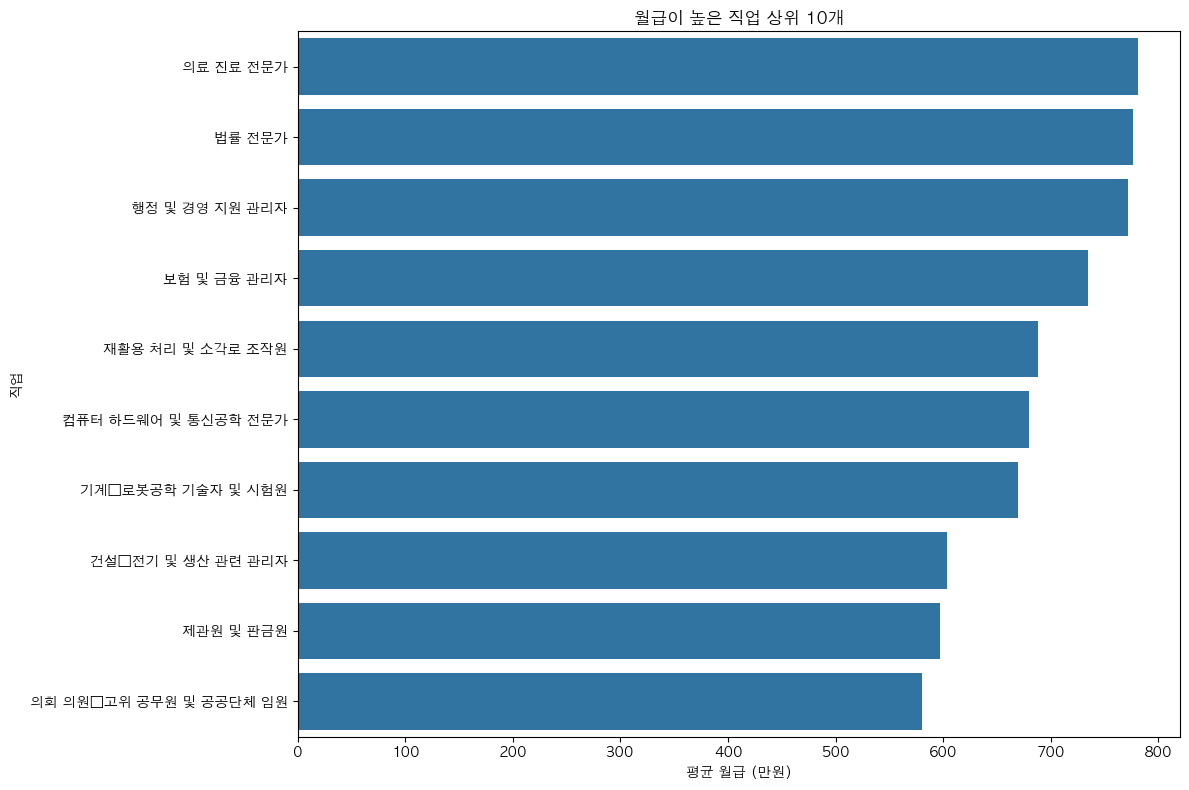

In [116]:
# 월급이 높은 직업 상위 10개 시각화
plt.figure(figsize=(12, 8))
top10_jobs = job_income.head(10)
sns.barplot(y=top10_jobs.index, x=top10_jobs.values)
plt.title('월급이 높은 직업 상위 10개')
plt.xlabel('평균 월급 (만원)')
plt.ylabel('직업')
plt.tight_layout()
plt.show()

In [117]:
# 월급이 낮은 직업 하위 10개
print("직업별 평균 월급 (하위 10개):")
print(job_income.tail(10))

직업별 평균 월급 (하위 10개):
job
판매 관련 단순 종사자                140.909091
학예사∙사서 및 기록물 관리사            140.000000
채굴 및 토목 관련 기능 종사자           140.000000
농림∙어업 관련 단순 종사자             122.625000
음식 관련 단순 종사자                118.187500
돌봄 및 보건 서비스 종사자             117.162338
가사 및 육아 도우미                  92.455882
청소원 및 환경미화원                  88.461756
기타 서비스 관련 단순 종사자             77.789474
기타 돌봄∙보건 및 개인 생활 서비스 종사자     73.964286
Name: income, dtype: float64


/var/folders/w6/pbqyx4_d3mg5y024j_kq95xm0000gn/T/ipykernel_75702/2551045756.py:8: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/hajimin/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


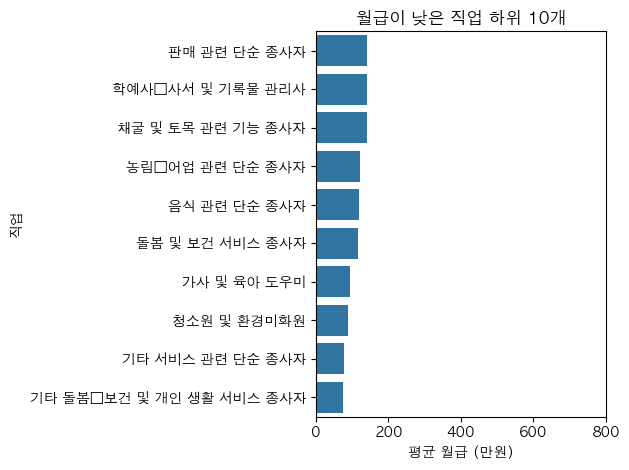

In [118]:
# 월급이 낮은 직업 하위 10개 시각화
bottom10_jobs = job_income.tail(10)
sns.barplot(y=bottom10_jobs.index, x=bottom10_jobs.values)
plt.title('월급이 낮은 직업 하위 10개')
plt.xlabel('평균 월급 (만원)')
plt.ylabel('직업')
plt.xlim(0, 800)  # 비교를 위해 x축 범위 설정
plt.tight_layout()
plt.show()

의료진료전문가가 가장 높은 월급을 받으며, 단순노무직 종사자들이 상대적으로 낮은 월급을 받는 것으로 나타났습니다.

## 7. 성별 직업 빈도 분석

In [119]:
# 남성 직업 빈도 상위 10개
job_male = welfare[(welfare['sex'] == 'male') & welfare['job'].notnull()]['job'].value_counts().head(10)
print("남성 직업 빈도 상위 10개:")
print(job_male)

남성 직업 빈도 상위 10개:
job
작물 재배 종사자         486
자동차 운전원           230
경영 관련 사무원         216
매장 판매 종사자         142
영업 종사자            113
청소원 및 환경미화원       109
건설 및 광업 단순 종사자     96
제조 관련 단순 종사자       80
건물 관리원 및 검표원       79
행정 사무원             74
Name: count, dtype: int64


In [120]:
# 여성 직업 빈도 상위 10개
job_female = welfare[(welfare['sex'] == 'female') & welfare['job'].notnull()]['job'].value_counts().head(10)
print("여성 직업 빈도 상위 10개:")
print(job_female)

여성 직업 빈도 상위 10개:
job
작물 재배 종사자           476
청소원 및 환경미화원         282
매장 판매 종사자           212
회계 및 경리 사무원         163
돌봄 및 보건 서비스 종사자     155
제조 관련 단순 종사자        148
음식 관련 단순 종사자        126
식음료 서비스 종사자         117
조리사                 114
기타 서비스 관련 단순 종사자     97
Name: count, dtype: int64


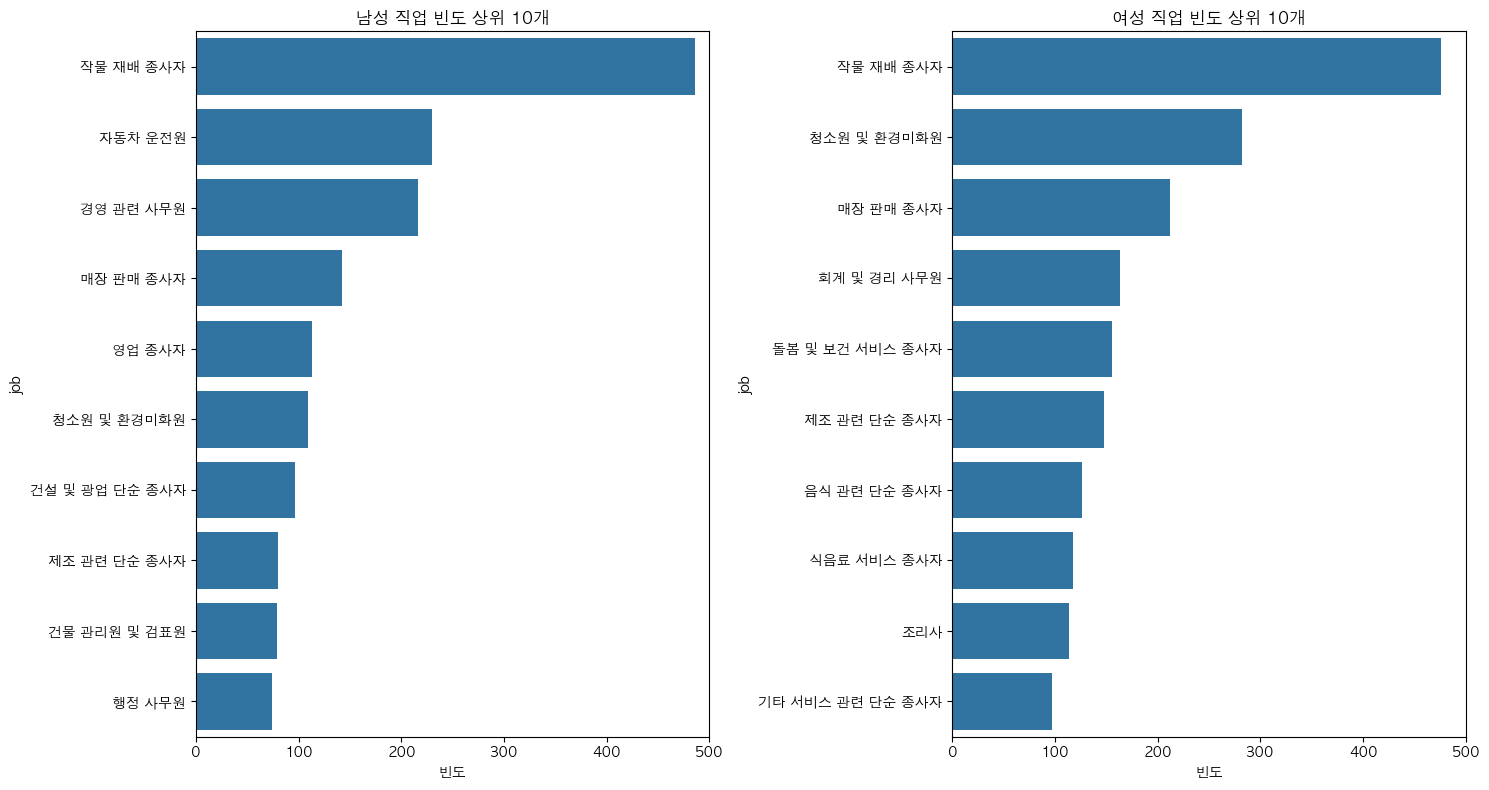

In [121]:
# 성별 직업 빈도 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# 남성 직업 빈도
sns.barplot(y=job_male.index, x=job_male.values, ax=ax1)
ax1.set_title('남성 직업 빈도 상위 10개')
ax1.set_xlabel('빈도')
ax1.set_xlim(0, 500)

# 여성 직업 빈도
sns.barplot(y=job_female.index, x=job_female.values, ax=ax2)
ax2.set_title('여성 직업 빈도 상위 10개')
ax2.set_xlabel('빈도')
ax2.set_xlim(0, 500)

plt.tight_layout()
plt.show()

남녀 모두 작물재배종사자가 가장 많지만, 그 이후 직업 분포는 성별에 따라 다른 패턴을 보입니다.

## 8. 지역별 연령대 비율 분석

### 지역 변수 전처리

In [122]:
# 지역 코드 확인
print("지역 코드 분포:")
welfare['code_region'].value_counts()

지역 코드 분포:


code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [123]:
# 지역 코드 매핑 (PDF 기준)
list_region = pd.DataFrame({
    'code_region': [1, 2, 3, 4, 5, 6, 7],
    'region': ['서울', '수도권(인천/경기)', '부산/경남/울산', '대구/경북', 
               '대전/충남', '강원/충북', '광주/전남/전북/제주도']
})

# 지역명 매핑
welfare = welfare.merge(list_region, how='left', on='code_region')

print("지역명 매핑 완료")
print("지역별 분포:")
welfare['region'].value_counts()

지역명 매핑 완료
지역별 분포:


region
수도권(인천/경기)      3246
광주/전남/전북/제주도    2466
부산/경남/울산        2448
서울              2002
대구/경북           1728
대전/충남           1391
강원/충북           1137
Name: count, dtype: int64

### 지역별 연령대 비율 분석

In [124]:
# 지역별 연령대 비율 계산
region_ageg = welfare.groupby('region')['ageg'].value_counts(normalize=True)
print("지역별 연령대 비율:")
print(region_ageg)

지역별 연령대 비율:
region        ageg  
강원/충북         old       0.459103
              middle    0.308707
              young     0.232190
광주/전남/전북/제주도  old       0.449311
              middle    0.317924
              young     0.232766
대구/경북         old       0.504051
              middle    0.296296
              young     0.199653
대전/충남         old       0.413372
              middle    0.336449
              young     0.250180
부산/경남/울산      old       0.437500
              middle    0.333742
              young     0.228758
서울            middle    0.385115
              old       0.376124
              young     0.238761
수도권(인천/경기)    middle    0.388170
              old       0.325015
              young     0.286815
Name: proportion, dtype: float64


In [125]:
# 비율을 백분율로 변환
region_ageg_pct = region_ageg * 100
region_ageg_pct = region_ageg_pct.round(1)

print("지역별 연령대 비율 (백분율):")
print(region_ageg_pct)

지역별 연령대 비율 (백분율):
region        ageg  
강원/충북         old       45.9
              middle    30.9
              young     23.2
광주/전남/전북/제주도  old       44.9
              middle    31.8
              young     23.3
대구/경북         old       50.4
              middle    29.6
              young     20.0
대전/충남         old       41.3
              middle    33.6
              young     25.0
부산/경남/울산      old       43.8
              middle    33.4
              young     22.9
서울            middle    38.5
              old       37.6
              young     23.9
수도권(인천/경기)    middle    38.8
              old       32.5
              young     28.7
Name: proportion, dtype: float64


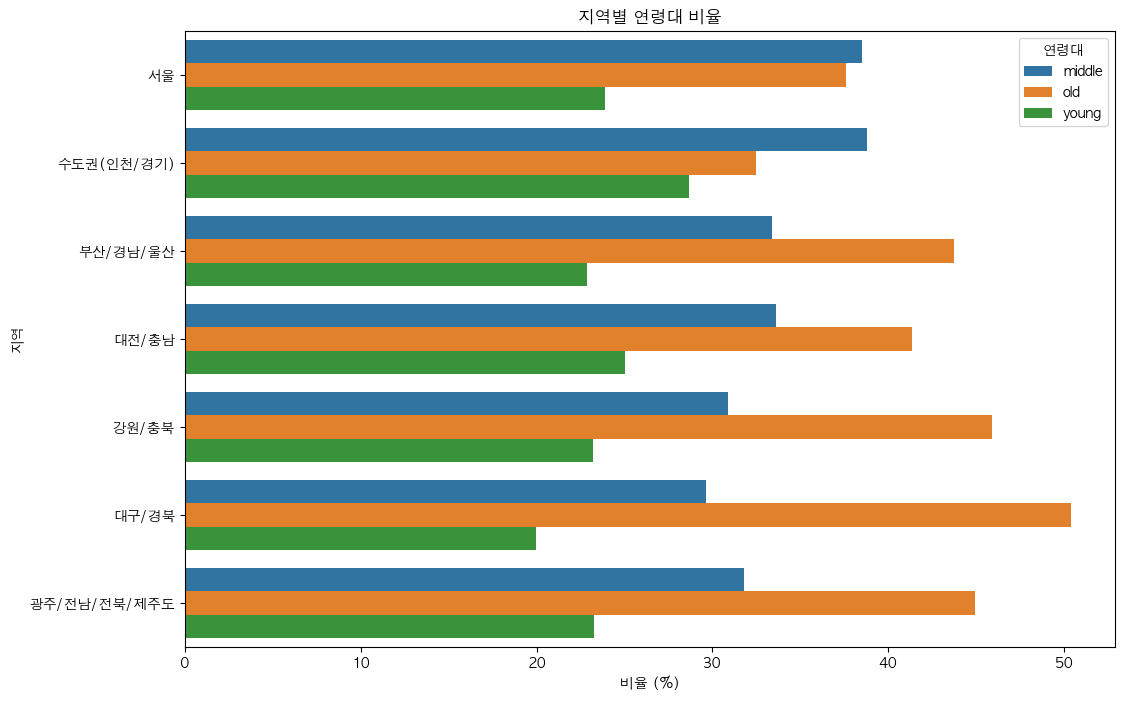

In [126]:
# 지역별 연령대 비율 시각화를 위한 데이터 준비
welfare_clean = welfare.dropna(subset=['region', 'ageg'])
region_ageg_count = welfare_clean.groupby(['region', 'ageg']).size().reset_index(name='count')
region_total = welfare_clean.groupby('region').size().reset_index(name='total')
region_ageg_prop = region_ageg_count.merge(region_total, on='region')
region_ageg_prop['proportion'] = region_ageg_prop['count'] / region_ageg_prop['total'] * 100

# 지역별 연령대 비율 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=region_ageg_prop, y='region', x='proportion', hue='ageg', 
           order=['서울', '수도권(인천/경기)', '부산/경남/울산', '대전/충남', '강원/충북', '대구/경북', '광주/전남/전북/제주도'])
plt.title('지역별 연령대 비율')
plt.xlabel('비율 (%)')
plt.ylabel('지역')
plt.legend(title='연령대')
plt.show()

### 누적 비율 막대 그래프

In [127]:
# 피벗 테이블 생성
region_ageg_pivot = welfare_clean.groupby(['region', 'ageg']).size().unstack(fill_value=0)
region_ageg_pivot = region_ageg_pivot.div(region_ageg_pivot.sum(axis=1), axis=0) * 100

print("지역별 연령대 비율 피벗 테이블:")
print(region_ageg_pivot)

지역별 연령대 비율 피벗 테이블:
ageg             middle        old      young
region                                       
강원/충북         30.870712  45.910290  23.218997
광주/전남/전북/제주도  31.792376  44.931062  23.276561
대구/경북         29.629630  50.405093  19.965278
대전/충남         33.644860  41.337168  25.017973
부산/경남/울산      33.374183  43.750000  22.875817
서울            38.511489  37.612388  23.876124
수도권(인천/경기)    38.817006  32.501540  28.681454


In [128]:
# 노년층 비율 기준으로 정렬
region_ageg_pivot_sorted = region_ageg_pivot.sort_values('old', ascending=True)

# 연령대 순서로 컬럼 재정렬
region_ageg_pivot_sorted = region_ageg_pivot_sorted[['young', 'middle', 'old']]

print("노년층 비율 기준 정렬된 테이블:")
print(region_ageg_pivot_sorted)

노년층 비율 기준 정렬된 테이블:
ageg              young     middle        old
region                                       
수도권(인천/경기)    28.681454  38.817006  32.501540
서울            23.876124  38.511489  37.612388
대전/충남         25.017973  33.644860  41.337168
부산/경남/울산      22.875817  33.374183  43.750000
광주/전남/전북/제주도  23.276561  31.792376  44.931062
강원/충북         23.218997  30.870712  45.910290
대구/경북         19.965278  29.629630  50.405093


<Figure size 1000x800 with 0 Axes>

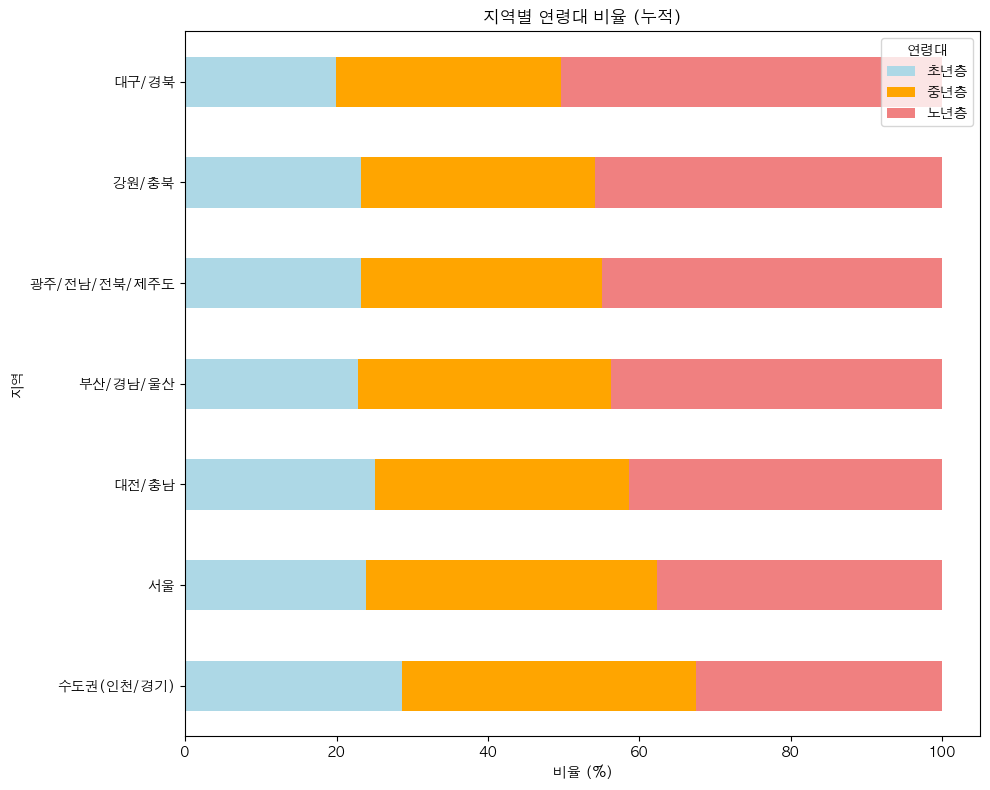

In [129]:
# 누적 비율 막대 그래프
plt.figure(figsize=(10, 8))
region_ageg_pivot_sorted.plot.barh(stacked=True, 
                                  color=['lightblue', 'orange', 'lightcoral'],
                                  figsize=(10, 8))
plt.title('지역별 연령대 비율 (누적)')
plt.xlabel('비율 (%)')
plt.ylabel('지역')
plt.legend(title='연령대', labels=['초년층', '중년층', '노년층'])
plt.tight_layout()
plt.show()

분석 결과, 대구/경북 지역의 노년층 비율이 가장 높고, 서울과 수도권은 상대적으로 젊은 인구 비율이 높은 것으로 나타났습니다.

## 분석 결과 요약

### 주요 발견사항

1. **성별 월급 격차**: 남성이 여성보다 평균 약 160만원 이상 높은 월급을 받고 있어 상당한 성별 임금 격차가 존재합니다.

2. **연령대별 월급 패턴**: 20대 초반에는 낮은 월급에서 시작하여 40대까지 지속적으로 증가하다가, 60대 후반부터 급격히 감소하는 전형적인 생애주기 소득 패턴을 보입니다.

3. **연령대별 격차**: 중년층(30-59세)이 가장 높은 월급을 받으며, 노년층의 월급은 초년층보다도 낮습니다.

4. **성별-연령대 교차분석**: 모든 연령대에서 남성이 여성보다 높은 월급을 받으며, 특히 중년층에서 성별 간 격차가 가장 큽니다.

5. **직업별 격차**: 의료진료전문가가 가장 높은 월급을 받는 반면, 단순노무직 종사자들은 상대적으로 낮은 월급을 받아 직업 간 상당한 소득 격차가 존재합니다.

6. **성별 직업 분포**: 남녀 모두 작물재배종사자가 가장 많지만, 그 이후 직업 분포는 성별에 따라 다른 패턴을 보입니다.

7. **지역별 인구 구조**: 대구/경북 지역의 고령화가 가장 심각하며, 서울과 수도권은 상대적으로 젊은 인구 비율이 높습니다.